# Section 4.6 — Generalized linear models

This notebook contains the code examples from [Section 4.6 Generalized linear models]() from the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# Ensure required Python modules are installed
%pip install --quiet numpy scipy seaborn pandas ministats

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load Python modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={"font.family": "serif",
        "font.serif": ["Palatino", "DejaVu Serif", "serif"],
        "figure.figsize": (5, 3)},
)
%config InlineBackend.figure_format = 'retina'

<Figure size 640x480 with 0 Axes>

In [4]:
# simple float __repr__
np.set_printoptions(legacy='1.25')

In [5]:
# Download datasets/ directory if necessary
from ministats import ensure_datasets
ensure_datasets()

datasets/ directory present and ready.


## Definitions

### Probability representations and link functions 

#### Odds

In [6]:
0.5/(1-0.5), 0.9/(1-0.9), 0.2/(1-0.2)

(1.0, 9.000000000000002, 0.25)

#### Log-odds

In [7]:
np.log(0.5/(1-0.5)), np.log(0.9/(1-0.9)), np.log(0.2/(1-0.2))

(0.0, 2.1972245773362196, -1.3862943611198906)

#### The logit function

In [8]:
def logit(p):
    x = np.log(p / (1-p))
    return x

# ALT. import the function from `scipy.special`
from scipy.special import logit

In [9]:
logit(0.5), logit(0.9), logit(0.2)

(0.0, 2.1972245773362196, -1.3862943611198906)

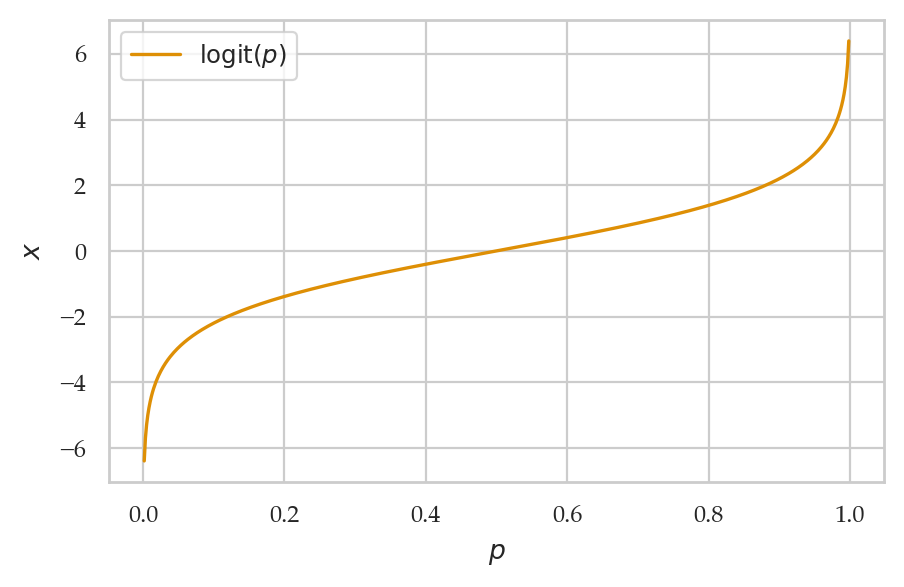

In [10]:
ps = np.linspace(0, 1, 600)
ax = sns.lineplot(x=ps, y=logit(ps), label="$\\mathrm{logit}(p)$", color="C1")
ax.set_xlabel("$p$")
ax.set_ylabel("$x$");

#### The logistic function

In [11]:
def expit(x):
    p = 1 / (1 + np.exp(-x))
    return p

# ALT. import the function from `scipy.special`
from scipy.special import expit

In [12]:
expit(0), expit(2), expit(-2)

(0.5, 0.8807970779778823, 0.11920292202211755)

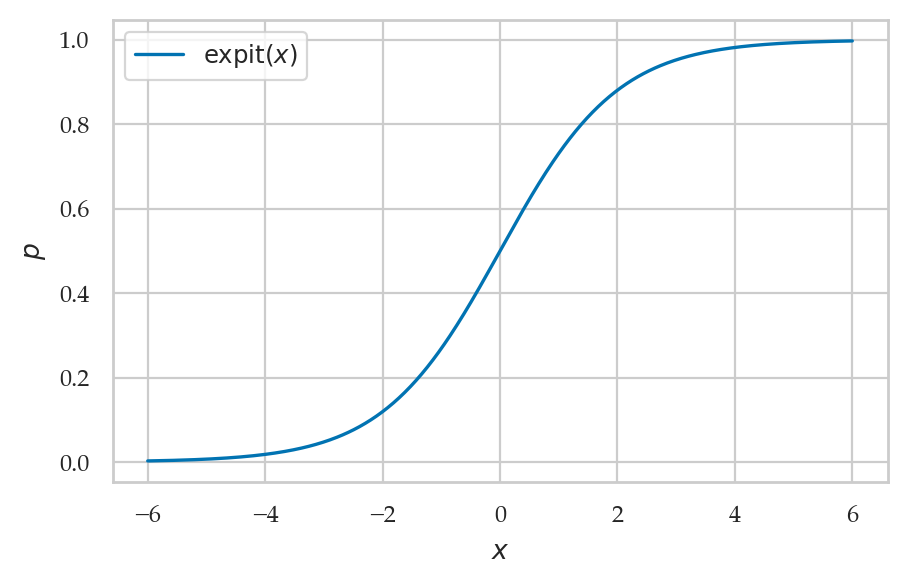

In [13]:
xs = np.linspace(-6, 6, 500)
ax = sns.lineplot(x=xs, y=expit(xs), label="$\\mathrm{expit}(x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$p$");

#### The logistic and logit functions are inverses 

In [14]:
expit(logit(0.2))

0.2

In [15]:
logit(expit(3))

3.000000000000003

## Logistic regression

TODO FORMULA

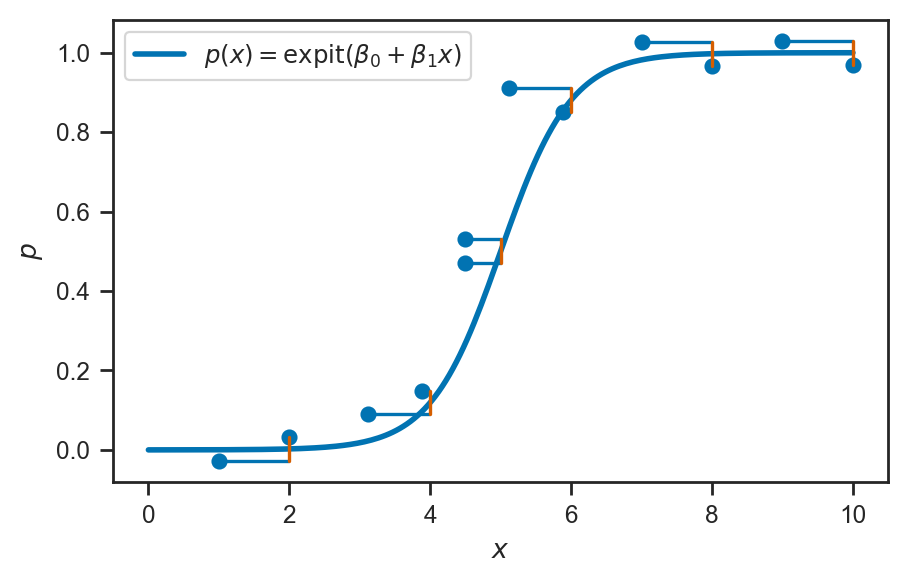

In [16]:
from scipy.stats import bernoulli
from scipy.special import expit

# Define the logistic regression model function
def expit_model(x):
    p = expit(-10 + 2*x)
    return p

xlims = [0, 10]
stem_half_width = 0.03

with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(5, 3))

    # Plot the logistic regression model
    xs = np.linspace(xlims[0], xlims[1], 200)
    ps = expit_model(xs)
    sns.lineplot(x=xs, y=ps, ax=ax, label=r"$p(x) = \mathrm{expit}(\beta_0 + \beta_1x)$", linewidth=2)

    # Plot Bernoulli distributions at specified x positions
    x_positions = [2,4,5,6,8,10]
    for x_pos in x_positions:
        p_pos = expit_model(x_pos)
        ys = [0,1]
        pmf = bernoulli(p=p_pos).pmf(ys)
        ys_plot = [p_pos-stem_half_width, p_pos+stem_half_width]
        ax.stem(ys_plot, x_pos - pmf, bottom=x_pos, orientation='horizontal')

    # Figure setup
    ax.set_xlabel("$x$")
    ax.set_ylabel("$p$")
    ax.legend(loc="upper left")

In [17]:
expit(-6)

0.0024726231566347743

In [18]:
expit(10)

0.9999546021312976

### Example 1: hiring student interns

In [19]:
interns = pd.read_csv("datasets/interns.csv")
print(interns.shape)
interns.head(3)

(100, 2)


,work,hired
0,42.5,1
1,39.3,0
2,43.2,1


In [20]:
import statsmodels.formula.api as smf

lr1 = smf.logit("hired ~ 1 + work", data=interns).fit()
print(lr1.params)

Optimization terminated successfully.
         Current function value: 0.138101
         Iterations 10
Intercept   -78.693205
work          1.981458
dtype: float64


In [21]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  hired   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                  0.8005
Time:                        00:59:09   Log-Likelihood:                -13.810
converged:                       True   LL-Null:                       -69.235
Covariance Type:            nonrobust   LLR p-value:                 6.385e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -78.6932     19.851     -3.964      0.000    -117.600     -39.787
work           1.9815      0.500      3.959      0.000       1.001       2.962
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

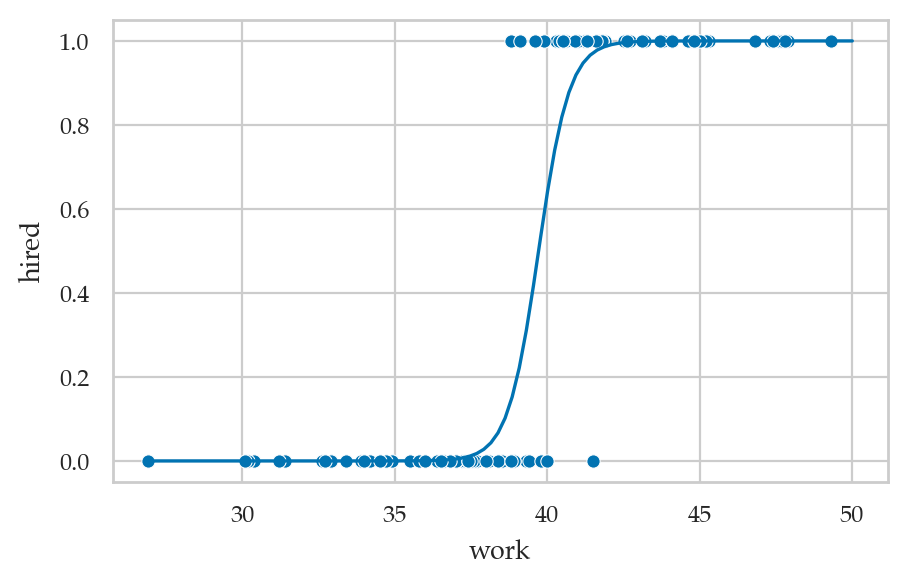

In [22]:
ax = sns.scatterplot(data=interns, x="work", y="hired")
wgrid = np.linspace(27, 50, 100)
hired_preds = lr1.predict({"work": wgrid})
sns.lineplot(x=wgrid, y=hired_preds, ax=ax);

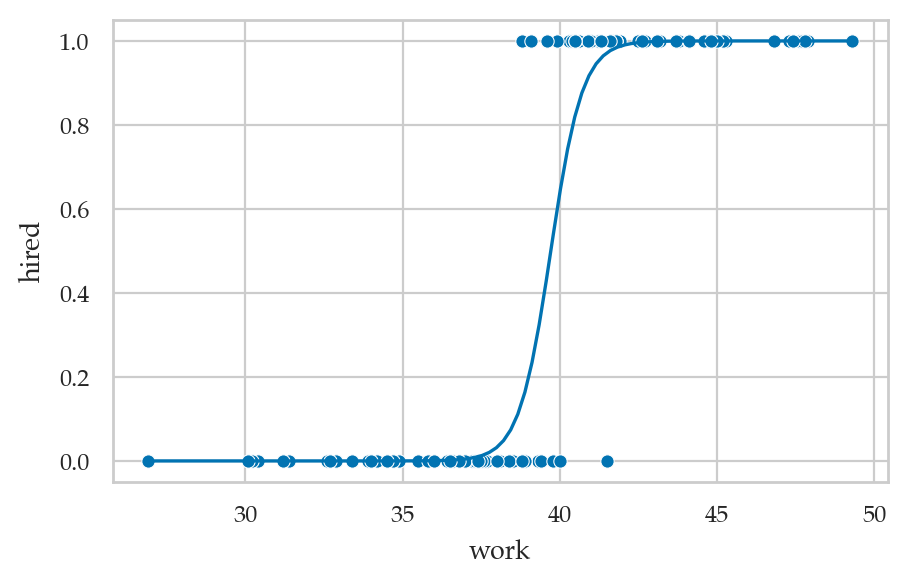

In [23]:
# ALT.
from ministats import plot_reg
plot_reg(lr1);

In [24]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  hired   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                  0.8005
Time:                        00:59:09   Log-Likelihood:                -13.810
converged:                       True   LL-Null:                       -69.235
Covariance Type:            nonrobust   LLR p-value:                 6.385e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -78.6932     19.851     -3.964      0.000    -117.600     -39.787
work           1.9815      0.500      3.959      0.000       1.001       2.962
==============================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Interpreting the model parameters

#### Parameters as changes in the log-odds

In [25]:
lr1.params["work"]

1.9814577697476687

#### Parameters as ratios of odds

In [26]:
np.exp(lr1.params["work"])

7.253308936265722

#### Differences in probabilities

What is the *marginal effect* of the predictor `work`
for an intern who invests 40 hours of effort?

In [27]:
# using `statsmodels`
lr1.get_margeff(atexog={1:40}).summary_frame()

,dy/dx,Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
work,0.45783,0.112623,4.065157,0.000048,0.237093,0.678567


In [28]:
lr1.get_margeff(atexog={1:42}).summary_frame()

,dy/dx,Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
work,0.020949,0.021358,0.98084,0.326672,-0.020912,0.06281


In [29]:
# # ALT. manual calculation plugging into derivative of `expit`
# p40 = lr1.predict({"work":40}).item()
# marg_effect_at_40 = p40 * (1 - p40) * lr1.params['work']
# marg_effect_at_40

### Prediction

In [30]:
p42 = lr1.predict({"work":42})[0]
p42

0.9893134055105761

## Poisson regression

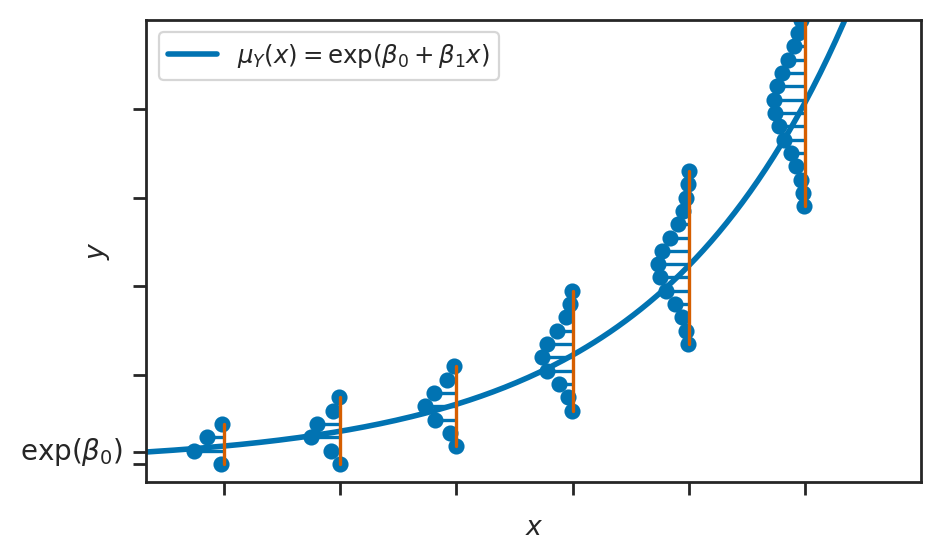

In [31]:
from scipy.stats import poisson

# Define the linear model function
def exp_model(x):
    lam = np.exp(1 + 0.2*x)
    return lam

onepixel = 0.07

xlims = [0, 20]
ylims = [0, 100]

with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(5, 3))

    # Plot the linear model
    xs = np.linspace(xlims[0], xlims[1], 200)
    lams = exp_model(xs)
    sns.lineplot(x=xs, y=lams, ax=ax, label=r"$\mu_Y(x) = \exp(\beta_0 + \beta_1x)$", linewidth=2)
    
    # Plot Gaussian distributions at specified x positions and add sigma lines
    x_positions = range(2, xlims[1]-1, 3)
    for x_pos in x_positions:
        lam_pos = exp_model(x_pos)
        sigma = np.sqrt(lam_pos)
        ys_lower = int(lam_pos-2.5*sigma)
        ys_upper = int(lam_pos+3.4*sigma)
        ys = np.arange(ys_lower, ys_upper, 3)
        pmf = poisson(mu=lam_pos).pmf(ys)
        # ax.fill_betweenx(ys, x_pos - 2 * pmf * sigma, x_pos, color="grey", alpha=0.5)
        ax.stem(ys, x_pos- 2 * pmf * sigma, bottom=x_pos, orientation='horizontal')
        # Draw vertical sigma line and label it on the opposite side of the Gaussian shape
        # ax.plot([x_pos+onepixel, x_pos+onepixel], [lam_pos, lam_pos - sigma], "k", lw=1)
        # ax.text(x_pos + 0.1, lam_pos - sigma / 2 - 3*onepixel, r"$\sigma$", fontsize=12, va="center")

    # y-intercept
    ax.text(0 - 0.6, np.exp(1), r"$\exp(\beta_0)$", fontsize=10, va="center", ha="right")

    # Set up x-axis
    ax.set_xlim(xlims)
    ax.set_xlabel("$x$")
    ax.set_xticks(range(2, xlims[1], 3))
    ax.set_xticklabels([])
    
    # Set up y-axis
    ax.set_ylim([ylims[0]-4,ylims[1]])
    ax.set_ylabel("$y$")
    ax.set_yticks(list(range(ylims[0],ylims[1],20)) + [np.exp(1)] )
    ax.set_yticklabels([])
    
    ax.legend(loc="upper left")

### Example 2: hard disk failures over time

In [32]:
hdisks = pd.read_csv("datasets/hdisks.csv")
hdisks.head(3)

,age,failures
0,1.7,3
1,14.6,46
2,10.9,23


In [33]:
import statsmodels.formula.api as smf

pr2 = smf.poisson("failures ~ 1 + age", data=hdisks).fit()
pr2.params

Optimization terminated successfully.
         Current function value: 2.693129
         Iterations 6


Intercept    1.075999
age          0.193828
dtype: float64

In [34]:
pr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               failures   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                  0.6412
Time:                        00:59:10   Log-Likelihood:                -269.31
converged:                       True   LL-Null:                       -750.68
Covariance Type:            nonrobust   LLR p-value:                2.271e-211
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0760      0.076     14.114      0.000       0.927       1.225
age            0.1938      0.007     28.603      0.000       0.181       0.207
==============================================================================
"""

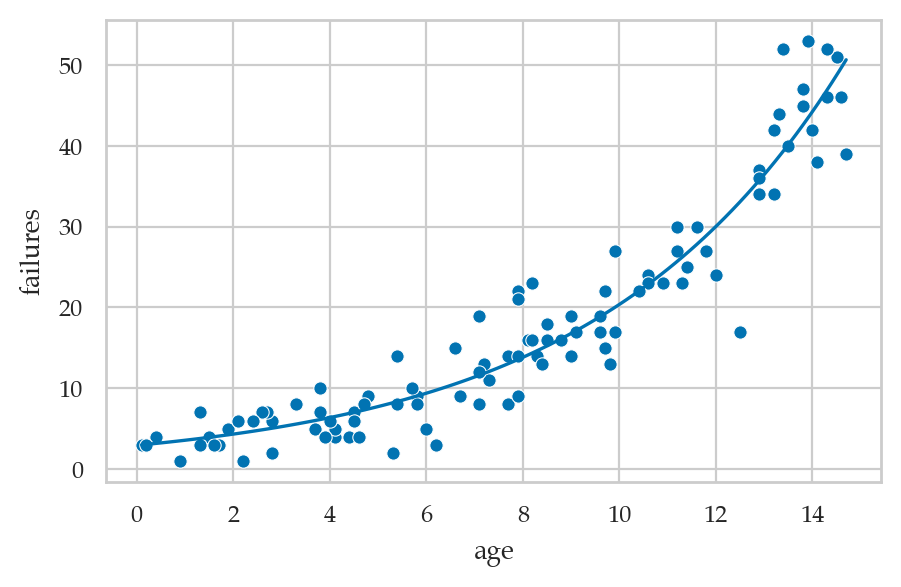

In [35]:
from ministats import plot_reg
plot_reg(pr2);

In [36]:
pr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               failures   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                  0.6412
Time:                        00:59:10   Log-Likelihood:                -269.31
converged:                       True   LL-Null:                       -750.68
Covariance Type:            nonrobust   LLR p-value:                2.271e-211
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0760      0.076     14.114      0.000       0.927       1.225
age            0.1938      0.007     28.603      0.000       0.181       0.207
==============================================================================
"""

#### Interpreting the model parameters

#### Log-counts

In [37]:
pr2.params["age"]

0.1938278482145407

#### Incidence rate ratio (IRR)

In [38]:
np.exp(pr2.params["age"])

1.213887292102993

#### Marginal effect

What is the marginal effect of the predictor `age`
for a 10 year old hard disk installation?

In [39]:
# using `statsmodels` .get_margeff() method
pr2.get_margeff(atexog={1:10}).summary_frame()

,dy/dx,Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
age,3.94912,0.151882,26.001165,4.804151e-149,3.651435,4.246804


In [40]:
# # ALT. manual calculation of the slope by evaluating the derivative
# b_0 = pr2.params['Intercept']
# b_age = pr2.params['age']
# np.exp(b_0 + b_age*10)*b_age

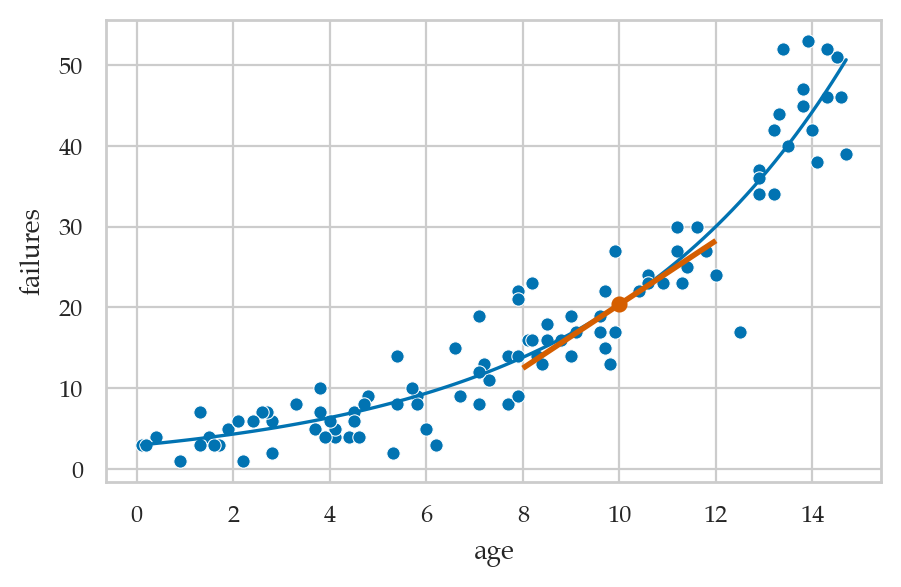

In [41]:
ax = plot_reg(pr2)

# Show the tangent line at age=10 (the marginal effect)
ptx, pty = (10, pr2.predict({"age":10})[0])
slope = pr2.get_margeff(atexog={1:10}).margeff[0]
dx = 2
endpoint1 = [ptx - dx, pty - dx*slope]
endpoint2 = [ptx + dx, pty + dx*slope]
lines = [[endpoint1, endpoint2]]
from matplotlib import collections as mc
lc = mc.LineCollection(lines, color="r", lw=2)
ax.plot([ptx], [pty], marker="o", color="r", alpha=1)
ax.add_collection(lc);

#### Predictions

In [42]:
lam10 = pr2.predict({"age":10})[0]
lam10

20.374365915173986

In [43]:
from scipy.stats import poisson
Hhat = poisson(mu=lam10)
Hhat.ppf(0.05), Hhat.ppf(0.95)

(13.0, 28.0)

## Explanations

### The exponential family of distributions

- exponential
- Gaussian (normal)
- Poisson
- Binomial
- 

### The generalized linear model template

- choose 


### Generalized linear models using statsmodels

In [44]:
import statsmodels.api as sm

Norm = sm.families.Gaussian()
Bin = sm.families.Binomial()
Pois = sm.families.Poisson()

#### Linear model

In [45]:
students = pd.read_csv('datasets/students.csv')
formula0 = "score ~ 1 + effort"
glm0 = smf.glm(formula0, data=students, family=Norm).fit()
glm0.params

Intercept    32.465809
effort        4.504850
dtype: float64

#### Logistic regression

In [46]:
formula1 = "hired ~ 1 + work"
glm1 = smf.glm(formula1, data=interns, family=Bin).fit()
glm1.params
# glm1.summary()

Intercept   -78.693205
work          1.981458
dtype: float64

#### Poisson regression

In [47]:
formula2 = "failures ~ 1 + age"
glm2 = smf.glm(formula2, data=hdisks, family=Pois).fit()
glm2.params
# glm2.summary()

Intercept    1.075999
age          0.193828
dtype: float64

### Fitting generalized linear models

## Discussion

### Model diagnostics and validation

In [48]:
# Dispersion from GLM attributes
# glm2.pearson_chi2 / glm2.df_resid

In [49]:
# Calculate Pearson chi-squared statistic
observed = hdisks['failures']
predicted = pr2.predict()
pearson_residuals = (observed - predicted) / np.sqrt(predicted)
pearson_chi2 = np.sum(pearson_residuals**2)
df_resid = pr2.df_resid
dispersion = pearson_chi2 / df_resid
print(f'Dispersion: {dispersion}')
# If dispersion > 1, consider Negative Binomial regression

Dispersion: 0.9869289289681199


### Logistic regression as a building blocks for neural networks


The operation of the [perceptron](https://en.wikipedia.org/wiki/Perceptron),
which is the basic building block of neural networks,
is essentially the same as linear regression model:

- constant intercept (bias term)
- linear combination of inputs
- nonlinear function used to force the output to be between 0 and 1



### Limitations of GLMs

- GLMs assume observations are independent
- Assumes distribution $\mathcal{M}$ is one of the exponential family
- Outliers can be problematic
- Interpretability


## Exercises

### Exercise 1: probabilities to odds and log-odds

In [50]:
0.3/(1-0.3), 0.99/(1-0.99), 0.7/(1-0.7)

(0.4285714285714286, 98.99999999999991, 2.333333333333333)

In [51]:
logit(0.3), logit(0.99), logit(0.7)

(-0.8472978603872037, 4.595119850134589, 0.8472978603872034)

### Exercise 2: log-odds to probabilities

In [52]:
expit(-1), expit(1), expit(2)

(0.2689414213699951, 0.7310585786300049, 0.8807970779778823)

### Exercise 3: students pass or fail

a) Load the dataset `students.csv` and add a column `passing`
that contains 1 or 0, based on the above threshold score of `70`.

In [53]:
students = pd.read_csv('datasets/students.csv')
students["passing"] = (students["score"] > 70).astype(int)
# students.head()

b) Fit a logistic regression model for `passing` based on `effort` variable.

In [54]:
lmpass = smf.logit("passing ~ 1 + effort", data=students).fit()
lmpass.params

Optimization terminated successfully.
         Current function value: 0.276583
         Iterations 8


Intercept   -16.257302
effort        2.047882
dtype: float64

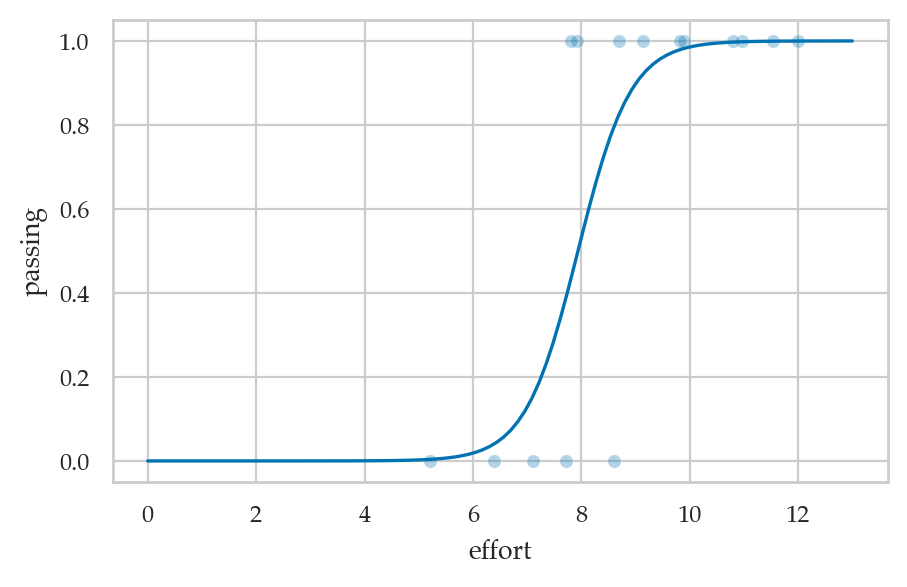

In [55]:
efforts = np.linspace(0, 13, 100)
passing_preds = lmpass.predict({"effort": efforts})
ax = sns.scatterplot(data=students, x="effort", y="passing", alpha=0.3)
sns.lineplot(x=efforts, y=passing_preds, ax=ax);

c) Use your model to predict the probability of a new student with effort 10 will pass.

In [56]:
lmpass.predict({"effort":10})

0    0.985536
dtype: float64

In [57]:
# ALT. compute prediction manually
intercept, b_effort = lmpass.params
expit(intercept + b_effort*10)

0.9855358765361845

### Exercise 4: titanic survival data

Fit a logistic regression model that calculates the probability of survival for people who were on the Titanic,
based on the data in `datasets/exercises/titanic.csv`. Use the variables `age`, `sex`, and `pclass` as predictors.

cf. [Titanic_Logistic_Regression.ipynb](./explorations/Titanic_Logistic_Regression.ipynb)

In [58]:
titanic = pd.read_csv('datasets/exercises/titanic.csv')
formula = "survived ~ age + C(sex) + C(pclass)"
lrtitanic = smf.logit(formula, data=titanic).fit()
lrtitanic.params

Optimization terminated successfully.
         Current function value: 0.453279
         Iterations 6


Intercept         3.777013
C(sex)[T.M]      -2.522781
C(pclass)[T.2]   -1.309799
C(pclass)[T.3]   -2.580625
age              -0.036985
dtype: float64

Use your logistic regression model to estimate the probability of survival for
a 30 year old female traveling in second class.

In [59]:
pass30Fpclass2 = {"age":30, "sex":"F", "pclass":2}
lrtitanic.predict(pass30Fpclass2)

0    0.795378
dtype: float64

In [60]:
# # Cross check with sklearn
# from sklearn.linear_model import LogisticRegression
# df = pd.get_dummies(titanic, columns=['sex', 'pclass'], drop_first=True)
# X, y = df.drop('survived', axis=1), df['survived']
# sktitanic = LogisticRegression(penalty=None)
# sktitanic.fit(X, y)
# sktitanic.intercept_, sktitanic.coef_

### Exercise 5: asthma attacks

Fit a Poisson regression model to the `datasets/exercises/asthma.csv` dataset.

data source https://github.com/drkamarul/multivar_data_analysis/blob/main/data/asthma.csv

In [61]:
asthma = pd.read_csv("datasets/exercises/asthma.csv")
asthma

,gender,res_inf,ghq12,attack
0,female,yes,21,6
1,male,no,17,4
2,male,yes,30,8
3,female,yes,22,5
4,male,yes,27,2
...,...,...,...,...
115,male,yes,0,2
116,female,yes,31,2
117,female,yes,18,2
118,female,yes,21,3


In [62]:
formula_asthma = "attack ~ 1 + C(gender) + C(res_inf) + ghq12"
prasthma = smf.poisson(formula_asthma, data=asthma).fit()
prasthma.params

Optimization terminated successfully.
         Current function value: 1.707281
         Iterations 6


Intercept           -0.315387
C(gender)[T.male]   -0.041905
C(res_inf)[T.yes]    0.426431
ghq12                0.049508
dtype: float64

cf. https://bookdown.org/drki_musa/dataanalysis/poisson-regression.html#multivariable-analysis-1

### Exercise 6: student admissions dataset

The dataset `datasets/exercises/binary.csv` contains information
about the acceptance decision for 400 students to a prestigious school.
Try to fit a logistic regression model for the variable `admit`
using the variables `gre`, `gpa`, and `rank` as predictors.

In [63]:
# ORIGINAL https://stats.idre.ucla.edu/stat/data/binary.csv
binary = pd.read_csv('datasets/exercises/binary.csv')
binary.head(3)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1


In [64]:
lrbinary = smf.logit('admit ~ gre + gpa + C(rank)', data=binary).fit()
lrbinary.params

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


Intercept      -3.989979
C(rank)[T.2]   -0.675443
C(rank)[T.3]   -1.340204
C(rank)[T.4]   -1.551464
gre             0.002264
gpa             0.804038
dtype: float64

The above model uses the rank=1 as the reference category an the log odds reported are with respect to this catrgory

$$
   \log p(accept|rank=1) / \log p(accept|rank=2) = \texttt{C(rank)rank[T.2]} = -0.675443
$$

etc. for others
rank[T.3] 	-1.340204
rank[T.4] 	-1.551464


See [LogisticRegressionChangeOfReferenceCategoricalValue.ipynb](./explorations/LogisticRegressionChangeOfReferenceCategoricalValue.ipynb) for exercise recodign relative to different refrence level.


In [65]:
# # Cross check with sklearn
# from sklearn.linear_model import LogisticRegression
# df = pd.get_dummies(binary, columns=['rank'], drop_first=True)
# X, y = df.drop("admit", axis=1), df["admit"]
# lr = LogisticRegression(solver="lbfgs", penalty=None, max_iter=1000)
# lr.fit(X, y)
# lr.intercept_,  lr.coef_

### Exercise 7: ship accidents

https://rdrr.io/cran/AER/man/ShipAccidents.html

https://pages.stern.nyu.edu/~wgreene/Text/tables/tablelist5.htm

https://pages.stern.nyu.edu/~wgreene/Text/tables/TableF21-3.txt

In [66]:
# TODO

## Links

TODO

# CUT MATERIAL

## Bonus Exercises

### Bonus exercise A: honors class

https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [67]:
honors = pd.read_csv("datasets/exercises/honors.csv")
honors.sample(4)

,female,read,write,math,hon,femalexmath
149,1,45,55,44,0,44
150,1,47,37,43,0,43
77,0,68,59,56,0,0
60,0,50,46,45,0,0


#### Constant model

In [68]:
lrhon1 = smf.logit("hon ~ 1", data=honors).fit()
lrhon1.params

Optimization terminated successfully.
         Current function value: 0.556775
         Iterations 5


Intercept   -1.12546
dtype: float64

In [69]:
expit(lrhon1.params["Intercept"])

0.24500000000000005

In [70]:
honors["hon"].value_counts(normalize=True)

hon
0    0.755
1    0.245
Name: proportion, dtype: float64

#### Using only a categorical variable

In [71]:
lrhon2 = smf.logit("hon ~ 1 + female", data=honors).fit()
lrhon2.params

Optimization terminated successfully.
         Current function value: 0.549016
         Iterations 5


Intercept   -1.470852
female       0.592782
dtype: float64

In [72]:
pd.crosstab(honors["hon"], honors["female"], margins=True)

female,0,1,All
hon,,,
0,74,77,151
1,17,32,49
All,91,109,200


In [73]:
b0 = lrhon2.params["Intercept"]
b_female = lrhon2.params["female"]

In [74]:
# male prob
expit(b0), 17/91

(0.18681318681318684, 0.18681318681318682)

In [75]:
# male odds
np.exp(b0), 17/74  # = (17/91) / (74/91)

(0.2297297297297298, 0.22972972972972974)

In [76]:
# male log-odds
b0, np.log(17/74)

(-1.4708517491479534, -1.4708517491479536)

In [77]:
# female prob
expit(b0 + b_female), 32/109

(0.29357798165137605, 0.29357798165137616)

In [78]:
# female odds
np.exp(b0 + b_female), 32/77 # = (32/109) / (77/109)

(0.41558441558441545, 0.4155844155844156)

In [79]:
b0 + b_female, np.log(32/77)

(-0.8780695190539576, -0.8780695190539572)

In [80]:
# odds female relative to male
np.exp(b_female)

1.8090145148968668

#### Logistic regression with a single continuous predictor variable

In [81]:
lrhon3 = smf.logit("hon ~ 1 + math", data=honors).fit()
lrhon3.params

Optimization terminated successfully.
         Current function value: 0.417683
         Iterations 7


Intercept   -9.793942
math         0.156340
dtype: float64

So the model equation is 

$$
    \log(p/(1-p)) = \texttt{logit}(p) = -9.793942  + .1563404 \cdot \texttt{math}
$$

In [82]:
# Increase in log-odds between math=54 and math=55
p54 = lrhon3.predict({"math":[54]}).item()
p55 = lrhon3.predict({"math":[55]}).item()
logit(p55) - logit(p54), lrhon3.params["math"]

(0.15634035558592174, 0.15634035558592269)

We can say now that the coefficient for math is the difference in the log odds.  In other words, for a one-unit increase in the math score, the expected change in log odds is .1563404.

In [83]:
# Increase (multiplicative) in odds for unit increase in math
np.exp(lrhon3.params["math"]),  (p55/(1-p55)) / (p54/(1-p54))

(1.1692240873242834, 1.1692240873242823)

So we can say for a one-unit increase in math score, we expect to see about 17% increase in the odds of being in an honors class.  This 17% of increase does not depend on the value that math is held at.

#### Logistic regression with multiple predictor variables and no interaction terms

In [84]:
lrhon4 = smf.logit("hon ~ 1 + math + female + read", data=honors).fit()
lrhon4.params

Optimization terminated successfully.
         Current function value: 0.390424
         Iterations 7


Intercept   -11.770246
math          0.122959
female        0.979948
read          0.059063
dtype: float64

#### Logistic regression with an interaction term of two predictor variables

In [85]:
lrhon5 = smf.logit("hon ~ 1 + math + female + femalexmath", data=honors).fit()
lrhon5.params

Optimization terminated successfully.
         Current function value: 0.399417
         Iterations 7


Intercept     -8.745841
math           0.129378
female        -2.899863
femalexmath    0.066995
dtype: float64

In [86]:
# ALT. without using `femalexmath` column
# lrhon5 = smf.logit("hon ~ 1 + math + female + female*math", data=honors).fit()
# lrhon5.params

### Bonus exercise: LA high schools (NOT A VERY GOOD FIT FOR POISSON MODEL)

Dataset info: 
http://www.philender.com/courses/intro/assign/data.html

This dataset consists of data from computer exercises collected from two high school in the Los Angeles area.


http://www.philender.com/courses/intro/code.html



In [87]:
lahigh_raw = pd.read_stata("https://stats.idre.ucla.edu/stat/stata/notes/lahigh.dta")
lahigh = lahigh_raw.convert_dtypes()

lahigh["gender"] = lahigh["gender"].astype(object).replace({1:"F", 2:"M"})
lahigh["ethnic"] = lahigh["ethnic"].astype(object).replace({
    1:"Native American",
    2:"Asian",
    3:"African-American",
    4:"Hispanic",
    5:"White",
    6:"Filipino",
    7:"Pacific Islander"})
lahigh["school"] = lahigh["school"].astype(object).replace({1:"Alpha", 2:"Beta"})
lahigh.head()

,id,gender,ethnic,school,mathpr,langpr,mathnce,langnce,biling,daysabs
0,1001,M,Hispanic,Alpha,63,36,56.988831,42.450859,2,4
1,1002,M,Hispanic,Alpha,27,44,37.094158,46.820587,2,4
2,1003,F,Hispanic,Alpha,20,38,32.275455,43.566574,2,2
3,1004,F,Hispanic,Alpha,16,38,29.056717,43.566574,2,3
4,1005,F,Hispanic,Alpha,2,14,6.748048,27.248474,3,3


In [88]:
formula = "daysabs ~ 1 + mathnce + langnce + C(gender)"
prlahigh = smf.poisson(formula, data=lahigh).fit()
prlahigh.params

Optimization terminated successfully.
         Current function value: 4.898642
         Iterations 5


Intercept         2.687666
C(gender)[T.M]   -0.400921
mathnce          -0.003523
langnce          -0.012152
dtype: float64

In [89]:
# IRR
np.exp(prlahigh.params[1:])

C(gender)[T.M]    0.669703
mathnce           0.996483
langnce           0.987921
dtype: float64

In [90]:
# CI for IRR F 
np.exp(prlahigh.conf_int().loc["C(gender)[T.M]"])

0    0.609079
1    0.736361
Name: C(gender)[T.M], dtype: float64

In [91]:
# prlahigh.summary()
# prlahigh.aic, prlahigh.bic

#### Diagnostics 

via https://www.statsmodels.org/dev/examples/notebooks/generated/postestimation_poisson.html

In [92]:
prdiag = prlahigh.get_diagnostic()
# Plot observed versus predicted frequencies for entire sample
# prdiag.plot_probs();

# Other:
# ['plot_probs',
#  'probs_predicted',
#  'results',
#  'test_chisquare_prob',
#  'test_dispersion',
#  'test_poisson_zeroinflation',
#  'y_max']

In [93]:
# Code to get exactly the same numbers as in
# https://stats.oarc.ucla.edu/stata/output/poisson-regression/  
formula2 = "daysabs ~ 1 + mathnce + langnce + C(gender, Treatment(1))"
prlahigh2 = smf.poisson(formula2, data=lahigh).fit()
prlahigh2.params

Optimization terminated successfully.
         Current function value: 4.898642
         Iterations 5


Intercept                       2.286745
C(gender, Treatment(1))[T.F]    0.400921
mathnce                        -0.003523
langnce                        -0.012152
dtype: float64